In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.linear_model import LinearRegression

# **Laptop Prices**


##Leer archivo de Drive


In [ ]:
from google.colab import files

In [3]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
laptops = pd.read_csv(
    "/content/drive/MyDrive/Ciencia de datos/laptop_price.csv", encoding="latin-1"
)
laptops.shape

(1303, 13)

##Leer columnas de una BD


In [ ]:
columnas_laptops = laptops.columns
print(columnas_laptops)

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')


##Campana de Gauss


In [ ]:
precios = laptops["Price_euros"]

media = np.mean(precios)
desviacion = np.std(precios)

# Generar una serie de valores en un rango adecuado
x = np.linspace(media - 3 * desviacion, media + 3 * desviacion, 100)

# Calcular los valores de la campana de Gauss
y = np.exp(-((x - media) ** 2) / (2 * desviacion**2)) / (
    desviacion * np.sqrt(2 * np.pi)
)

# Crear el gráfico de la campana de Gauss
plt.plot(x, y)
plt.xlabel("Precio (euros)")
plt.ylabel("Probabilidad")
plt.title("Campana de Gauss para los precios")
plt.show()

##Leer una parte de la BD


In [ ]:
laptops.loc[0:5]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00


##Manejo de columnas y filas de una BD

---


In [5]:
filas = laptops.shape[0]
columns = laptops.shape[1]
print("Filas:", filas)
print("Columnas:", columns)

Filas: 1303
Columnas: 13


In [6]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [7]:
laptops["Weight"] = laptops["Weight"].str.replace("kg", "")

In [8]:
laptops.rename(columns={"Weight": "Weight(kg)"}, inplace=True)

In [9]:
laptops["Weight(kg)"] = laptops["Weight(kg)"].astype(float)

In [10]:
laptops["Ram"] = laptops["Ram"].str.replace("GB", "")

In [11]:
laptops.rename(columns={"Ram": "Ram(GB)"}, inplace=True)

In [12]:
laptops["Ram(GB)"] = laptops["Ram(GB)"].astype(float)

In [13]:
laptops["GHz"] = laptops["Cpu"]

In [14]:
regex = r"([\d.]+)GHz"
laptops["GHz"] = laptops["GHz"].str.extract(regex, expand=False).astype(float)

In [15]:
laptops["SSD(GB)"] = laptops["Memory"]
laptops["HDD(GB)"] = laptops["Memory"]
laptops["Flash Memory(GB)"] = laptops["Memory"]

In [76]:
laptops["SSD(GB)"] = laptops["Memory"].str.extract(
    r"(\d+)(?:GB|TB) SSD").astype(float)
laptops["HDD(GB)"] = laptops["Memory"].str.extract(
    r"(\d+)(?:GB|TB) HDD").astype(float)
laptops["Flash Memory(GB)"] = (
    laptops["Memory"].str.extract(r"(\d+)GB Flash Storage").astype(float)
)

##Buscar valores nulos en una tabla


In [ ]:
laptops.isnull() * 1

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price_euros,GHz,SSD(GB),HDD(GB),Flash Memory(GB),Price_mxn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1299,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


##BD con filtros


In [ ]:
laptops.sort_values("Price_euros", ascending=False)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
196,200,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,6099.0
830,839,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,5499.0
610,617,Lenovo,Thinkpad P51,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Xeon E3-1535M v6 3.1GHz,32GB,1TB SSD,Nvidia Quadro M2200M,Windows 10,2.5kg,4899.0
749,758,HP,Zbook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5 2.9GHz,16GB,256GB SSD,Nvidia Quadro M2000M,Windows 7,3kg,4389.0
1066,1081,Asus,ROG G701VO,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64GB,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58kg,3975.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,295,Acer,Chromebook C910-C2ST,Notebook,15.6,1366x768,Intel Celeron Dual Core 3205U 1.5GHz,2GB,16GB SSD,Intel HD Graphics,Chrome OS,2.19kg,199.0
31,32,Asus,E402WA-GA010T (E2-6110/2GB/32GB/W10),Notebook,14.0,1366x768,AMD E-Series E2-6110 1.5GHz,2GB,32GB Flash Storage,AMD Radeon R2,Windows 10,1.65kg,199.0
1120,1135,Vero,V131 (X5-Z8350/4GB/32GB/FHD/W10),Notebook,13.3,Full HD 1920x1080,Intel Atom X5-Z8350 1.44GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.35kg,196.0
20,21,Asus,Vivobook E200HA,Netbook,11.6,1366x768,Intel Atom x5-Z8350 1.44GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,0.98kg,191.9


In [ ]:
mayor_3500 = laptops["Price_euros"] > 3500
laptops[mayor_3500]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight,Price_euros,GHz
196,200,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32.0,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,6099.0,2.9
238,243,Asus,ROG G703VI-E5062T,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,32.0,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1080,Windows 10,4.7kg,3890.0,2.9
610,617,Lenovo,Thinkpad P51,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Xeon E3-1535M v6 3.1GHz,32.0,1TB SSD,Nvidia Quadro M2200M,Windows 10,2.5kg,4899.0,3.1
723,731,Dell,Alienware 17,Gaming,17.3,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,32.0,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.36kg,3659.4,2.8
749,758,HP,Zbook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5 2.9GHz,16.0,256GB SSD,Nvidia Quadro M2000M,Windows 7,3kg,4389.0,2.9
780,789,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,32.0,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070M,Windows 10,4.42kg,3588.8,2.8
830,839,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32.0,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,5499.0,2.9
1066,1081,Asus,ROG G701VO,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64.0,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58kg,3975.0,2.7
1136,1151,HP,ZBook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8.0,256GB SSD,Nvidia Quadro M3000M,Windows 7,3kg,3949.4,2.6


In [ ]:
laptops.groupby("Company").agg(
    {"Price_euros": ["min", "max", "mean"]}).round(2)

Price_euros                  
                  min      max     mean
Company                                
Acer           174.00  2599.00   626.78
Apple          898.94  2858.00  1564.20
Asus           191.90  3975.00  1104.17
Chuwi          244.99   449.00   314.30
Dell           274.90  3659.40  1186.07
Fujitsu        649.00   799.00   729.00
Google        1275.00  2199.00  1677.67
HP             209.00  4389.00  1067.77
Huawei        1349.00  1499.00  1424.00
LG            1899.00  2299.00  2099.00
Lenovo         229.00  4899.00  1086.38
MSI            839.00  2799.00  1728.91
Mediacom       239.00   389.00   295.00
Microsoft      989.00  2589.00  1612.31
Razer         1029.00  6099.00  3346.14
Samsung        269.00  1849.00  1413.44
Toshiba        447.00  2799.00  1267.81
Vero           196.00   260.00   217.42
Xiaomi         935.00  1399.95  1133.46

In [ ]:
laptops.groupby("TypeName").count()["laptop_ID"]

TypeName
2 in 1 Convertible    121
Gaming                205
Netbook                25
Notebook              727
Ultrabook             196
Workstation            29
Name: laptop_ID, dtype: int64

In [ ]:
laptops.groupby("TypeName").agg(
    {"Price_euros": ["min", "max", "mean"]}).round(2)

Price_euros                 
                           min     max     mean
TypeName                                       
2 in 1 Convertible       275.0  2824.0  1282.40
Gaming                   699.0  6099.0  1731.38
Netbook                  174.0  1908.0   636.23
Notebook                 196.0  4899.0   782.08
Ultrabook                499.0  3100.0  1548.23
Workstation             1369.0  4389.0  2280.36

In [ ]:
laptops.groupby("Company").count()["laptop_ID"]

Company
Acer         103
Apple         21
Asus         158
Chuwi          3
Dell         297
Fujitsu        3
Google         3
HP           274
Huawei         2
LG             3
Lenovo       297
MSI           54
Mediacom       7
Microsoft      6
Razer          7
Samsung        9
Toshiba       48
Vero           4
Xiaomi         4
Name: laptop_ID, dtype: int64

In [ ]:
laptops.pivot_table(
    index="Company", columns="Ram(GB)", values="Price_euros", aggfunc="mean"
).fillna(0).round(2)

Ram(GB),2.0,4.0,6.0,8.0,12.0,16.0,24.0,32.0,64.0
Company,,,,,,,,,
Acer,234.33,449.91,479.00,796.33,787.33,2033.00,0.0,0.00,0.0
Apple,0.00,959.00,0.00,1369.61,0.00,2493.85,0.0,0.00,0.0
Asus,227.72,444.29,608.00,1082.39,1111.18,1845.05,2118.5,2656.00,3975.0
Chuwi,0.00,246.94,449.00,0.00,0.00,0.00,0.0,0.00,0.0
Dell,379.00,612.35,454.00,1133.24,991.81,1875.25,0.0,3150.92,0.0
Fujitsu,0.00,649.00,0.00,769.00,0.00,0.00,0.0,0.00,0.0
Google,0.00,0.00,0.00,1417.00,0.00,2199.00,0.0,0.00,0.0
HP,231.00,718.28,636.49,1276.64,1637.00,1862.15,0.0,0.00,0.0
Huawei,0.00,0.00,0.00,1424.00,0.00,0.00,0.0,0.00,0.0


In [ ]:
laptops.pivot_table(
    index="Ram(GB)", columns="GHz", values="Price_euros", aggfunc="mean"
).fillna(0).round(2)

GHz,0.90,1.00,1.10,1.20,1.30,1.44,1.50,1.60,1.80,1.90,...,2.40,2.50,2.60,2.70,2.80,2.90,3.00,3.10,3.20,3.60
Ram(GB),,,,,,,,,,,,,,,,,,,,,
2.0,0.0,0.0,274.82,0.00,0.00,213.90,190.67,273.69,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00
4.0,669.0,603.0,363.04,0.00,0.00,354.13,342.57,451.20,323.00,0.00,...,632.98,748.33,914.00,687.99,999.00,354.00,446.78,0.0,0.0,0.00
6.0,0.0,0.0,449.00,0.00,0.00,0.00,0.00,619.00,0.00,0.00,...,492.50,661.99,799.00,756.00,0.00,549.99,569.33,0.0,0.0,573.29
8.0,729.0,0.0,939.65,1580.03,1557.37,0.00,0.00,979.75,1107.38,1298.00,...,1172.58,1073.74,1522.05,1247.33,1413.35,1752.48,1127.97,1921.8,1695.0,429.00
12.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,846.50,609.00,0.00,...,0.00,1009.30,1782.25,984.68,1538.71,0.00,0.00,0.0,0.0,924.00
16.0,0.0,0.0,0.00,1965.00,1915.67,0.00,0.00,0.00,1490.96,1607.96,...,0.00,1702.07,1861.36,1989.61,1991.27,2990.20,2267.67,0.0,0.0,0.00
24.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1269.00,2382.00,2968.00,0.00,0.00,0.0,0.0,0.00
32.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,2800.00,2556.00,3209.41,4571.75,0.00,4899.0,0.0,0.00
64.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,3975.00,0.00,0.00,0.00,0.0,0.0,0.00


##Operaciones básicas de columnas de tipo integer


In [ ]:
laptops_describe = laptops.drop("laptop_ID", axis=1).describe()
print(laptops_describe)

            Inches      Ram(GB)  Price_euros
count  1303.000000  1303.000000  1303.000000
mean     15.017191     8.382195  1123.686992
std       1.426304     5.084665   699.009043
min      10.100000     2.000000   174.000000
25%      14.000000     4.000000   599.000000
50%      15.600000     8.000000   977.000000
75%      15.600000     8.000000  1487.880000
max      18.400000    64.000000  6099.000000


##Conteo de valores por columna


In [ ]:
laptops["TypeName"].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

##Quitar duplicados


In [ ]:
laptops.drop_duplicates(inplace=True)

##Análsis de la BD ahora si xd


In [92]:
def euros_mxn(euros):
    return euros * 18.70

In [93]:
def cambiar_a_GB(value):
    if value in [1.0, 2.0, 3.0, 4.0]:
        value *= 1000
    return value

In [94]:
laptops["Price_mxn"] = laptops["Price_euros"].apply(euros_mxn).round(2)
laptops["HDD(GB)"] = laptops["HDD(GB)"].apply(cambiar_a_GB).round(2)
laptops["SSD(GB)"] = laptops["SSD(GB)"].apply(cambiar_a_GB).round(2)

In [95]:
laptops.fillna(0, inplace=True)

In [96]:
laptops.loc[0:1]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price_euros,GHz,SSD(GB),HDD(GB),Flash Memory(GB),Price_mxn
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,128.0,0.0,0.0,25052.20
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,0.0,0.0,128.0,16810.18


Hipotesis: Encontrar el mejor dispositivo posible en terminos de calidad precio, para los diferentes tipos de Laptops, tomando en cuenta y dividiendo en 3 sub grupos segun el presupuesto de cada persona.

- RAM(gb)
- Memoria(SSD,HDD y Flash)
- Precio(MXN)
- Procesamiento del Cpu(GHz) teniendo en cuenta que una diferencia notable se empieza a ver con 0.5 de diferencia


In [97]:
Tipos_laptop = laptops["TypeName"].unique()
BasesDeDatosUnicas = {}
for tipo_laptop in Tipos_laptop:
    BasesDeDatosUnicas[tipo_laptop] = laptops[laptops["TypeName"]
                                              == tipo_laptop]
for DataFrame in BasesDeDatosUnicas.keys():
    print(f"{DataFrame}")
# print(BasesDeDatosUnicas["Gaming"])

Ultrabook
Notebook
Netbook
Gaming
2 in 1 Convertible
Workstation


In [98]:
BasesDeDatosUnicas["Gaming"].drop("laptop_ID", axis=1).describe()

,Inches,Ram(GB),Weight(kg),Price_euros,GHz,SSD(GB),HDD(GB),Flash Memory(GB),Price_mxn
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.0,205.000000
mean,16.345854,14.048780,2.949761,1731.380634,2.722439,234.185366,858.536585,0.0,32376.817805
std,0.927174,7.234013,0.759205,814.174430,0.142057,186.045495,413.601832,0.0,15225.061705
min,14.000000,4.000000,1.600000,699.000000,2.100000,0.000000,0.000000,0.0,13071.300000
25%,15.600000,8.000000,2.430000,1169.000000,2.600000,128.000000,1000.000000,0.0,21860.300000
50%,15.600000,16.000000,2.700000,1492.800000,2.800000,256.000000,1000.000000,0.0,27915.360000
75%,17.300000,16.000000,3.350000,2199.000000,2.800000,256.000000,1000.000000,0.0,41121.300000
max,18.400000,64.000000,4.700000,6099.000000,3.200000,1000.000000,2000.000000,0.0,114051.300000


In [99]:
BD_gaming = BasesDeDatosUnicas["Gaming"]

###Laptops Gaming menores a 22k


In [100]:
gaming_menor_22000 = BD_gaming.loc[BD_gaming["Price_mxn"] < 22000]
# gaming_menor_22000.drop("laptop_ID", axis=1).describe()
menor_22_16gb = gaming_menor_22000.loc[gaming_menor_22000["Ram(GB)"] >= 16]
menor_22_conSSDyHDD = menor_22_16gb.loc[
    (menor_22_16gb["SSD(GB)"] > 0) & (menor_22_16gb["HDD(GB)"] > 0)
]
menor_22_conSSDyHDD.loc[menor_22_conSSDyHDD["GHz"] > 2.5]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price_euros,GHz,SSD(GB),HDD(GB),Flash Memory(GB),Price_mxn
345,351,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16.0,256GB SSD + 2TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.40,1129.0,2.8,256.0,2000.0,0.0,21112.3
767,776,Dell,Inspiron 7559,Gaming,15.6,IPS Panel Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,16.0,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.72,1099.0,2.6,128.0,1000.0,0.0,20551.3
1228,1246,Lenovo,IdeaPad Y700-15ISK,Gaming,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6700HQ 2.6GHz,16.0,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,1029.0,2.6,128.0,1000.0,0.0,19242.3


Al final se seleccionaron estas 3 laptops en la rama economica por las siguientes razones:

- Las tres cumplen con tener mas de 16gb de RAM lo que permite ejecutar de manera eficiente una cantidad decente de videojuegos
- Cuentas con capacidad de procesamiento mayor a 2.5, por lo que permitira obtener una buena velocidad
- Cuentan con memoria SSD necesaria para un encendido más veloz y una inicializacion de las aplicaciones más rapido
- Tienen con al menos 1TB de memoria para las aplicaciones, archivos o juegos que dse almacenaran
  (Nota:En terminos de HDD la diferencia no es tan importante y si en algun futuro se llegara a necesitar más espacio de almacenamiento se pueden comprar memorias externas a muy bajos costos)

**Conclusión:**
Se podrá escoger cualquiera de estas 3 laptops para un buen rendimiento en videojuegos el unico factor diferencial serial el estetico que dependería del cliente para escoger.


###Laptops Gaming menores a 35k


<ipython-input-101-4b77f08f1d55>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(gaming_menor_35000_mas_ram16[columnas_a_analizar].corr(),annot=True)


<Axes: >

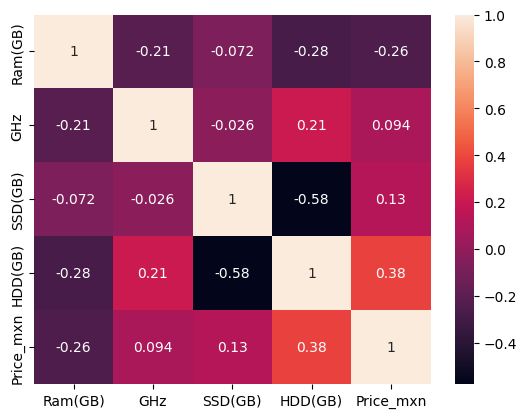

In [101]:
gaming_menor_35000 = BD_gaming.loc[
    (BD_gaming["Price_mxn"] < 35000) & (BD_gaming["Price_mxn"] > 22000)
]
# gaming_menor_35000.drop("laptop_ID",axis=1).describe()
gaming_menor_35000_mas_ram16 = gaming_menor_35000.loc[
    gaming_menor_35000["Ram(GB)"] >= 16
]
columnas_a_excluir = [
    "laptop_ID",
    "Inches",
    "Weight(kg)",
    "Price_euros",
    "Flash Memory(GB)",
]
columnas_a_analizar = [
    col for col in gaming_menor_35000_mas_ram16.columns if col not in columnas_a_excluir
]
sns.heatmap(
    gaming_menor_35000_mas_ram16[columnas_a_analizar].corr(), annot=True)

In [125]:
gaming_menor_35000["GPU_Calificacion"] = None

In [142]:
def asignar_calificacion(nombreGpu):
    if nombreGpu == "Nvidia GeForce GTX 1060":
        return 90
    elif nombreGpu == "Nvidia GeForce GTX 1050 Ti":
        return 79
    elif nombreGpu == "Nvidia GeForce GTX1050 Ti":
        return 79
    elif nombreGpu == "Nvidia GeForce GTX 1050":
        return 57
    elif nombreGpu == "Nvidia GeForce GTX 980M":
        return 54
    elif nombreGpu == "AMD Radeon RX 580":
        return 79
    elif nombreGpu == "Nvidia GeForce GTX 980M":
        return 54
    elif nombreGpu == "Nvidia GTX 980 SLI":
        return 66
    elif nombreGpu == "Nvidia GeForce GTX 1080":
        return 70
    elif nombreGpu == "Nvidia GeForce GTX 1070":
        return 78
    elif nombreGpu == "Nvidia GeForce GTX 980M":
        return 54
    elif nombreGpu == "Nvidia GeForce GTX 1070M":
        return 56
    elif nombreGpu == "Nvidia GeForce GTX 980":
        return 66
    else:
        return 0

In [134]:
laptops["GPU_Calificacion"] = laptops["Gpu"].apply(asignar_calificacion)

In [136]:
gaming_menor_35000 = gaming_menor_35000[
    (gaming_menor_35000["Ram(GB)"] >= 16)
    & (gaming_menor_35000["GHz"] > 2.6)
    & (gaming_menor_35000["HDD(GB)"] > 0)
    & (gaming_menor_35000["SSD(GB)"] > 256)
    & (gaming_menor_35000["GPU_Calificacion"] > 79)
]
gaming_menor_35000 = gaming_menor_35000.reset_index(drop=True)
gaming_menor_35000.sort_values("Price_mxn")

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price_euros,GHz,SSD(GB),HDD(GB),Flash Memory(GB),Price_mxn,GPU_Calificacion
1,207,Lenovo,Legion Y720-15IKB,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16.0,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.20,1749.0,2.8,512.0,1000.0,0.0,32706.3,90
0,204,Dell,Inspiron 7577,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16.0,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.65,1845.0,2.8,512.0,1000.0,0.0,34501.5,90


Se seleccionaron estas dos laptops por ser las laptops de gama media con una mejor calificacion de GPU para mejor resolución de videojuegos, además de contar con el poder de procesamiento más veloz por lo que la máxima diferencia podria ser el factor estetico de las laptops a la hora de escoger.


###Laptops Gaming mayores a 35k


In [155]:
gaming_mayor_35000 = gaming_mayor_35000.loc[BD_gaming["Price_mxn"] > 35000].copy(
)
gaming_mayor_35000.loc[:, "Gpu_Calificacion"] = gaming_mayor_35000["Gpu"].apply(
    asignar_calificacion
)
gaming_mayor_35000 = gaming_mayor_35000[
    (gaming_mayor_35000["Ram(GB)"] >= 32)
    & (gaming_mayor_35000["GHz"] > 2.5)
    & (gaming_mayor_35000["SSD(GB)"] >= 512)
    & (gaming_mayor_35000["Gpu_Calificacion"] >= 70)
    & (gaming_mayor_35000["Price_mxn"] < 70000)
    & (gaming_mayor_35000["Price_mxn"] > 53000)
]
gaming_mayor_35000.sort_values("Price_mxn")

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price_euros,GHz,SSD(GB),HDD(GB),Flash Memory(GB),Price_mxn,Gpu_Calificacion
841,851,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,32.0,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,3072.89,2.8,512.0,1000.0,0.0,57463.04,78
659,667,Dell,Alienware 17,Gaming,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,32.0,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,3147.37,2.8,512.0,1000.0,0.0,58855.82,78
723,731,Dell,Alienware 17,Gaming,17.3,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,32.0,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.36,3659.40,2.8,1000.0,1000.0,0.0,68430.78,78


La mejores laptops de gama alta pertener a Alienware 17, de las 3 laptops finalistas se recomienda la laptops con un SSD de 1000 debido a ser la más rapida de las 3 en levantamiento de aplicaciones, pero de igual manera se pueden comprar las otras dos sin sacrificar ningun rendimiento significante por lo que quedaria unicamente en terminos de presupuesto y estetica la laptop a escoger.
